# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.003
-0.001
-0.003
-0.003
-0.002
0.0
-0.002
-0.003
0.0
0.996
0.998
1.0
0.998
1.0
1.993
1.998
1.998
1.997
1.998
2.993
2.997
2.997
2.997
2.997
3.996
4.001
4.002
4.001
4.002
4.998
5.002
5.003
5.003
6.001
6.006
6.006
6.006
6.006
6.759
6.758
6.758
6.759
7.508
7.511
7.512
7.512
7.514
7.514
8.513
8.511
8.511
9.508
9.513
9.514
9.512
9.512
10.509
10.516
10.515
10.515
10.515
11.51
11.517
11.517
11.515
11.515
12.518
12.518
13.512
13.517
13.518
13.516
13.516
14.265
14.269
14.27
14.269
14.27
15.018
15.023
15.023
15.022
15.023
16.024
16.024
16.023
16.023
17.023
17.023
17.023
17.022
18.018
18.024
18.023
18.023
18.024
19.02
19.019
19.018
20.021
20.02
20.019
20.019
21.013
21.019
21.019
21.019
21.02
21.815
21.815
21.814
21.816
22.605
22.606
23.606
23.606
23.606
23.606
24.605
24.605
24.603
24.603
25.626
25.626
26.625
26.624
26.623
26.622
27.621
27.621
27.619
27.619
28.621
28.621
28.62
29.381
29.381
29.38
29.38
30.126
30.1

58.436
58.436
58.436
58.435
58.435
58.435
58.435
58.434
58.434
58.434
58.434
58.434
58.433
58.434
58.434
58.434
58.435
58.435
58.435
58.435
58.432
58.432
58.432
58.431
58.431
58.672
58.672
58.697
58.697
58.697
58.697
58.698
58.7
58.7
58.698
58.698
58.696
58.696
58.696
58.696
58.696
58.696
58.696
58.696
58.696
58.696
58.696
58.695
58.695
58.695
58.694
58.694
58.694
58.694
58.694
58.694
58.694
58.695
58.695
58.695
58.695
58.694
58.691
58.692
58.693
58.693
58.692
58.912
58.912
58.912
58.91
58.912
58.912
58.91
58.91
58.911
58.911
58.91
58.91
58.91
58.91
58.91
58.91
58.909
58.909
58.909
58.908
58.908
58.908
58.908
58.908
58.908
58.908
58.908
58.908
58.908
58.909
58.909
58.91
58.91
58.909
58.906
58.906
58.906
58.907
58.907
58.906
59.033
59.033
59.051
59.051
59.051
59.051
59.051
59.051
59.077
59.077
59.076
59.075
59.075
59.078
59.078
59.076
59.074
59.073
59.074
59.072
59.072
59.071
59.073
59.071
59.074
59.074
59.073
59.076
59.353
59.353
59.395
59.394
59.395
59.397
59.397
59.396
59.395
59.394


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1410,2820,61.048
1411,2822,61.048
1412,2824,61.047
1413,2826,61.047


<IPython.core.display.Javascript object>


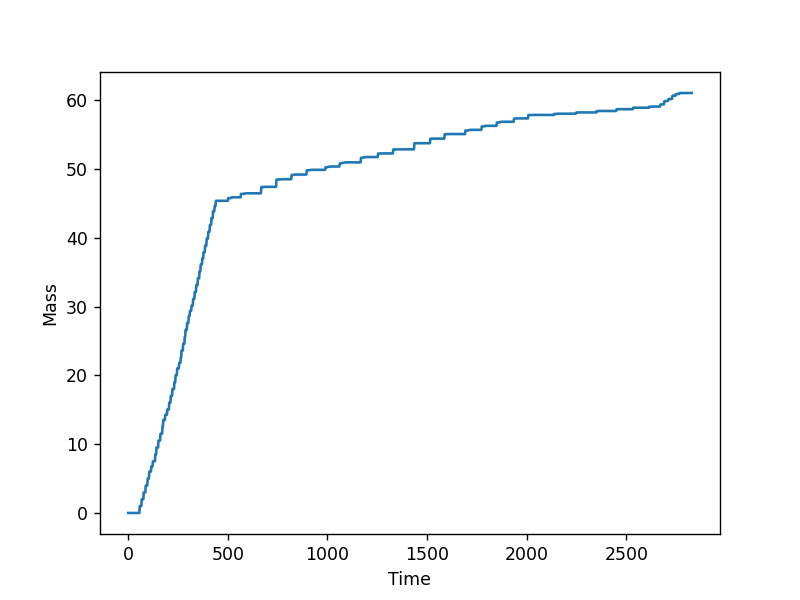

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_310723_S697-702.csv')